# 1. Boosting --> Regression

### Import Package

In [ ]:
import pandas as pd
import numpy as np

# for selecting Boosted variable from AUC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    roc_auc_score, roc_curve, accuracy_score, precision_score, recall_score,
    f1_score, fbeta_score, confusion_matrix
)
import statsmodels.api as sm
import matplotlib.pyplot as plt

### Get Variables

In [3]:
df1 = pd.read_csv('var_select_all_3.csv')

In [4]:
df1.head(40)

,feature,importance
0,roa,0.066956
1,pi_to_assets,0.029696
2,bonus_to_assets,0.025929
3,ib_to_assets,0.023910
4,option_to_asset,0.022393
5,page,0.021578
6,option_to_asset_3y_lag,0.020819
7,asset_turnover_3y_lag,0.020806
8,gender,0.018538
9,emp_to_assets,0.018458


In [5]:
df1.tail(20)

,feature,importance
42,inventory_turnover,0.013204
43,gross_margin,0.012968
44,debt_to_assets,0.012929
45,debt_to_assets_3y_lag,0.012827
46,ocf_to_sales,0.012766
47,dp_to_assets_3y_lag,0.012725
48,capx_to_assets_3y_lag,0.012713
49,equity_ratio_3y_lag,0.012568
50,ocf_to_assets,0.012059
51,current_ratio,0.012058


### Get Data / Data Processing before variable selection and logistic regression

In [ ]:
# Get Sample
df = pd.read_csv("matched_sampling_1_1.csv")
# df = pd.read_csv("matched_sampling_1_2.csv") # Do this if you want to get 1:2 case control sampling

# Train / Test Split
train_df = df[df['train1'] == 1].copy()
test_df  = df[df['test1'] == 1].copy()

# Set Target
target = 'forced_3' # Could do forced_3_4 as well

In [ ]:
# Define base features
base_features = [
    'I3y_lag', 'gender', 'page', 'roa', 'gross_margin', 'operating_margin', 'asset_turnover',
    'receivables_turnover', 'inventory_turnover', 'debt_to_assets', 'equity_ratio', 'debt_to_equity',
    'current_ratio', 'quick_ratio', 'working_capital', 'ocf_to_assets', 'ocf_to_sales',
    'ebit_to_assets', 'ebitda_to_assets', 'pi_to_assets', 'ib_to_assets', 'txt_to_assets',
    'xint_to_assets', 'capx_to_assets', 'dp_to_assets', 'emp_to_assets', 'tdc1_to_assets',
    'bonus_to_assets', 'ppent_to_assets', 're_to_assets', 'rect_to_assets', 'salary_to_assets',
    'option_to_asset', 'roa_3y_lag', 'gross_margin_3y_lag', 'operating_margin_3y_lag',
    'asset_turnover_3y_lag', 'receivables_turnover_3y_lag', 'inventory_turnover_3y_lag',
    'debt_to_assets_3y_lag', 'equity_ratio_3y_lag', 'debt_to_equity_3y_lag', 'current_ratio_3y_lag',
    'quick_ratio_3y_lag', 'working_capital_3y_lag', 'ocf_to_assets_3y_lag', 'ocf_to_sales_3y_lag',
    'ebit_to_assets_3y_lag', 'ebitda_to_assets_3y_lag', 'pi_to_assets_3y_lag', 'ib_to_assets_3y_lag',
    'txt_to_assets_3y_lag', 'xint_to_assets_3y_lag', 'capx_to_assets_3y_lag', 'dp_to_assets_3y_lag',
    'emp_to_assets_3y_lag', 'tdc1_to_assets_3y_lag', 'bonus_to_assets_3y_lag',
    'ppent_to_assets_3y_lag', 're_to_assets_3y_lag', 'rect_to_assets_3y_lag',
    'salary_to_assets_3y_lag', 'option_to_asset_3y_lag',
    # tenure dummies
    'Itenure1','Itenure2','Itenure3','Itenure4','Itenure5','Itenure6','Itenure7'
]

### Select features to keep by AUC

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


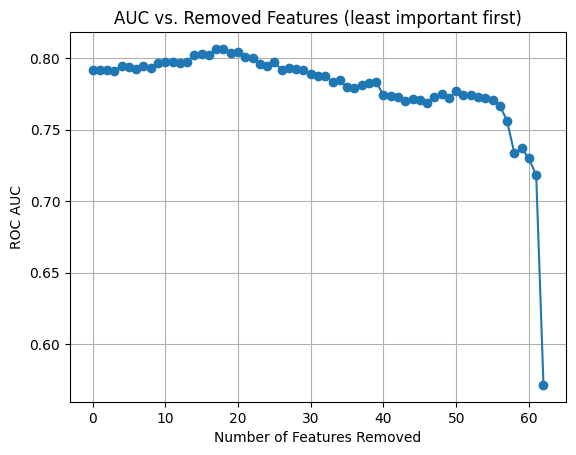

In [ ]:
# Features to always keep
always_keep = ['I3y_lag', 'Itenure1', 'Itenure2', 'Itenure3', 'Itenure4', 'Itenure5', 'Itenure6', 'Itenure7']

# Select features to apply log transformation
log_features = [f for f in base_features if f not in ['I3y_lag', 'Itenure1','Itenure2','Itenure3','Itenure4','Itenure5','Itenure6','Itenure7']]

# Apply log transformation (log(1 + x) to avoid negative/zero values)
for f in log_features:
    train_df[f] = np.log1p(train_df[f])
    test_df[f] = np.log1p(test_df[f])

# Candidates for removal (base_features excluding always_keep)
removable_features = [f for f in base_features if f not in always_keep]

# Sort removable_features by importance based on df1 (remove from least important)
sorted_removal = [f for f in df1.sort_values('importance')['feature'].tolist() if f in removable_features]

# Store results
results = []

# Iteratively remove more and more variables
for i in range(len(sorted_removal) + 1):
    # Features to remove
    to_remove = sorted_removal[:i]
    
    # Features to use currently
    current_features = [f for f in base_features if f not in to_remove]

    # Training data
    X_train = train_df[current_features]
    y_train = train_df[target]
    
    X_test = test_df[current_features]
    y_test = test_df[target]
    
    # Scaling (optional)
    scaler = StandardScaler()

    # Convert inf to NaN
    X_train = X_train.replace([np.inf, -np.inf], np.nan)
    X_test = X_test.replace([np.inf, -np.inf], np.nan)

    # Replace NaNs with mean values
    X_train = X_train.fillna(X_train.mean())
    X_test = X_test.fillna(X_test.mean())

    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Logistic regression
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train_scaled, y_train)
    y_pred_prob = model.predict_proba(X_test_scaled)[:, 1]
    
    # Calculate AUC
    auc = roc_auc_score(y_test, y_pred_prob)
    results.append({'removed_features': i, 'AUC': auc})

# Visualize results
result_df = pd.DataFrame(results)
plt.plot(result_df['removed_features'], result_df['AUC'], marker='o')
plt.xlabel('Number of Features Removed')
plt.ylabel('ROC AUC')
plt.title('AUC vs. Removed Features (least important first)')
plt.grid(True)
plt.show()

In [ ]:
# Store results
results = []

for i in range(len(sorted_removal) + 1):
    to_remove = sorted_removal[:i]
    current_features = [f for f in base_features if f not in to_remove]

    X_train = train_df[current_features]
    y_train = train_df[target]
    
    X_test = test_df[current_features]
    y_test = test_df[target]

    # Convert inf to NaN
    X_train = X_train.replace([np.inf, -np.inf], np.nan)
    X_test = X_test.replace([np.inf, -np.inf], np.nan)

    X_train = X_train.fillna(X_train.mean())
    X_test = X_test.fillna(X_test.mean())
    
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train, y_train)
    y_pred_prob = model.predict_proba(X_test)[:, 1]

    auc = roc_auc_score(y_test, y_pred_prob)
    
    results.append({
        'removed_features': i,
        'n_features': len(current_features),
        'AUC': auc
    })

# Create result table
result_df = pd.DataFrame(results)

# Print numeric table
print(result_df.head(30))

    removed_features  n_features       AUC
0                  0          70  0.794331
1                  1          69  0.794139
2                  2          68  0.793824
3                  3          67  0.793964
4                  4          66  0.794419
5                  5          65  0.794454
6                  6          64  0.793964
7                  7          63  0.794594
8                  8          62  0.794506
9                  9          61  0.798165
10                10          60  0.799198
11                11          59  0.798988
12                12          58  0.798813
13                13          57  0.799111
14                14          56  0.800284
15                15          55  0.800354
16                16          54  0.799146
17                17          53  0.801229
18                18          52  0.800301
19                19          51  0.799618
20                20          50  0.799548
21                21          49  0.798988
22         

### Get ROC Curve of optimal variable selected model

AUC (20개 제거): 0.8072


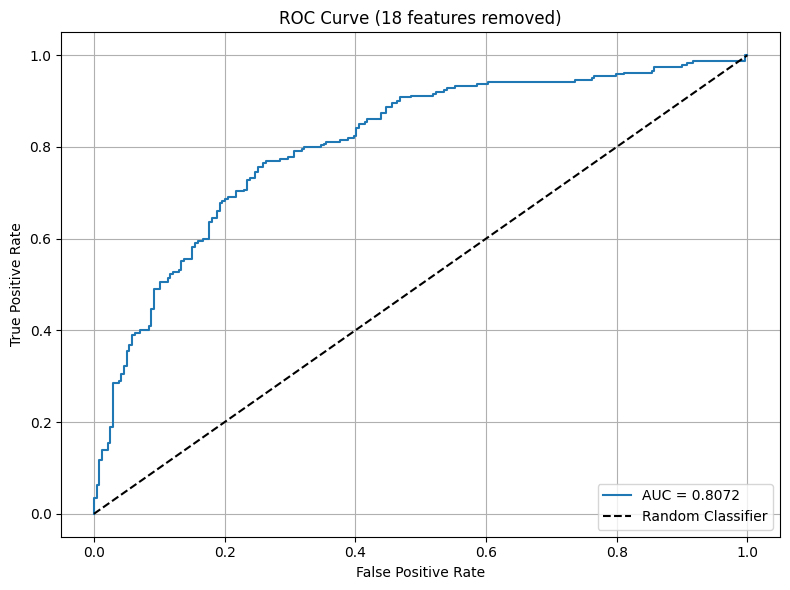

In [ ]:
# Select 18 features to remove
to_remove = sorted_removal[:18]
current_features = [f for f in base_features if f not in to_remove]

# Set X and y
X_train = train_df[current_features]
X_test = test_df[current_features]
y_train = train_df[target]
y_test = test_df[target]

# Convert inf to NaN
X_train = X_train.replace([np.inf, -np.inf], np.nan)
X_test = X_test.replace([np.inf, -np.inf], np.nan)

# Replace NaN with mean
X_train = X_train.fillna(X_train.mean())
X_test = X_test.fillna(X_train.mean())  # Use training mean for test set

# Apply StandardScaler (same as in loop)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

# Predict probabilities
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]

# Compute AUC
auc = roc_auc_score(y_test, y_pred_proba)
print(f"AUC (18 features removed): {auc:.4f}")

# Plot ROC curve
fpr, tpr, thresholds_roc = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.4f}')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (18 features removed)')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

### Derive Coefficient

In [ ]:
# Extract coefficients
coefficients = model.coef_[0]  # 1D array if not multiclass
feature_names = current_features

# Organize into Pandas Series (for readability)
import pandas as pd
coef_series = pd.Series(coefficients, index=feature_names)

# Sort by absolute value
coef_sorted = coef_series.sort_values(key=np.abs, ascending=False)

# Display top 10
print(coef_sorted.head(30))

ebitda_to_assets          -1.164796
dp_to_assets               0.739478
option_to_asset           -0.658999
ebit_to_assets             0.517806
page                       0.515344
ebit_to_assets_3y_lag      0.458247
roa                       -0.455945
ib_to_assets               0.439298
bonus_to_assets           -0.413429
ebitda_to_assets_3y_lag   -0.394223
ppent_to_assets           -0.353109
option_to_asset_3y_lag     0.328865
current_ratio_3y_lag      -0.279353
tdc1_to_assets             0.271599
pi_to_assets              -0.264010
Itenure6                  -0.240034
asset_turnover             0.225120
quick_ratio_3y_lag         0.204067
Itenure2                   0.188915
ppent_to_assets_3y_lag     0.171273
ocf_to_sales_3y_lag       -0.170495
gross_margin               0.169521
working_capital_3y_lag     0.167939
operating_margin          -0.157726
Itenure5                  -0.146091
Itenure4                  -0.136268
quick_ratio               -0.120643
debt_to_equity_3y_lag      0

### Run Logistic Regression

In [ ]:
# Feature selection and preprocessing
to_remove = sorted_removal[:20]
current_features = [f for f in base_features if f not in to_remove]

X_train = train_df[current_features]
y_train = train_df[target]

# Inf → NaN, then replace NaNs with mean
X_train = X_train.replace([np.inf, -np.inf], np.nan)
X_train = X_train.fillna(X_train.mean())

# Add intercept
X_train_const = sm.add_constant(X_train)

# Fit logistic regression model with statsmodels
logit_model = sm.Logit(y_train, X_train_const)
result = logit_model.fit()

# Print regression summary (includes p-values)
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.556717
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:               forced_3   No. Observations:                 1908
Model:                          Logit   Df Residuals:                     1858
Method:                           MLE   Df Model:                           49
Date:                Sun, 01 Jun 2025   Pseudo R-squ.:                  0.1968
Time:                        13:44:32   Log-Likelihood:                -1062.2
converged:                       True   LL-Null:                       -1322.5
Covariance Type:            nonrobust   LLR p-value:                 4.505e-80
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                         -14.2309        nan        nan        nan  

### Generate Optimal Thresholds

In [ ]:
# Generate candidate thresholds from 0.01 to 0.99 at intervals of 0.01
thresholds = np.arange(0.01, 1.0, 0.01)

# Store (threshold, score) for each metric
best_metrics = {
    'accuracy': (0, 0),
    'precision': (0, 0),
    'recall': (0, 0),
    'f1': (0, 0),
    'f2': (0, 0),
    'specificity': (0, 0),
}

for t in thresholds:
    y_pred = (y_pred_proba >= t).astype(int)
    
    # Decompose confusion matrix
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    
    # Calculate metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, zero_division=0)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    f2 = fbeta_score(y_test, y_pred, beta=2)
    spec = tn / (tn + fp) if (tn + fp) != 0 else 0  # Avoid division by zero
    
    # Update best scores
    if acc > best_metrics['accuracy'][1]:      best_metrics['accuracy'] = (t, acc)
    if prec > best_metrics['precision'][1]:    best_metrics['precision'] = (t, prec)
    if rec > best_metrics['recall'][1]:        best_metrics['recall'] = (t, rec)
    if f1 > best_metrics['f1'][1]:             best_metrics['f1'] = (t, f1)
    if f2 > best_metrics['f2'][1]:             best_metrics['f2'] = (t, f2)
    if spec > best_metrics['specificity'][1]:  best_metrics['specificity'] = (t, spec)

# Output results
print("Optimal thresholds for each metric:")
for metric, (threshold, score) in best_metrics.items():
    print(f"{metric.capitalize():<12}: Threshold = {threshold:.2f}, Score = {score:.4f}")

각 지표 기준 최적 Thresholds:
Accuracy    : Threshold = 0.49, Score = 0.7510
Precision   : Threshold = 0.98, Score = 1.0000
Recall      : Threshold = 0.01, Score = 1.0000
F1          : Threshold = 0.34, Score = 0.7627
F2          : Threshold = 0.30, Score = 0.8498
Specificity : Threshold = 0.98, Score = 1.0000


In [ ]:
best_threshold = best_metrics['f2'][0]
best_f2 = best_metrics['f2'][1]

y_pred_opt = (y_pred_proba >= best_threshold).astype(int)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_opt).ravel()

print(f"[F2 Optimal Threshold = {best_threshold:.2f}]")
print(f"Accuracy     : {accuracy_score(y_test, y_pred_opt):.4f}")
print(f"Precision    : {precision_score(y_test, y_pred_opt):.4f}")
print(f"Recall       : {recall_score(y_test, y_pred_opt):.4f}")
print(f"Specificity  : {tn / (tn + fp):.4f}")
print(f"F1 Score     : {f1_score(y_test, y_pred_opt):.4f}")
print(f"F2 Score     : {best_f2:.4f}")

[F2 기준 최적 Threshold = 0.30]
Accuracy     : 0.6883
Precision    : 0.6264
Recall       : 0.9331
Specificity  : 0.4435
F1 Score     : 0.7496
F2 Score     : 0.8498


In [ ]:
best_threshold = best_metrics['f1'][0]
y_pred_opt = (y_pred_proba >= best_threshold).astype(int)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_opt).ravel()

print(f"[F1 Optimal Threshold = {best_threshold:.2f}]")
print(f"Accuracy     : {accuracy_score(y_test, y_pred_opt):.4f}")
print(f"Precision    : {precision_score(y_test, y_pred_opt):.4f}")
print(f"Recall       : {recall_score(y_test, y_pred_opt):.4f}")
print(f"Specificity  : {tn / (tn + fp):.4f}")
print(f"F1 Score     : {f1_score(y_test, y_pred_opt):.4f}")

# Calculate F2 score at the threshold optimized for F1
f2_at_best_f1 = fbeta_score(y_test, y_pred_opt, beta=2)
print(f"F2 Score     : {f2_at_best_f1:.4f}")

[F1 기준 최적 Threshold = 0.34]
Accuracy     : 0.7176
Precision    : 0.6576
Recall       : 0.9079
Specificity  : 0.5272
F1 Score     : 0.7627
F2 Score     : 0.8437


# 2. Lasso

### Import Package

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# For model derivation
from sklearn.linear_model import LogisticRegressionCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

### Get Data

In [ ]:
# Get Sample
df = pd.read_csv("matched_sampling_1_1.csv")
# df = pd.read_csv("matched_sampling_1_2.csv") # Do this if you want to get 1:2 case control sampling

# Train / Test Split
train_df = df[df['train1'] == 1].copy()
test_df  = df[df['test1'] == 1].copy()

# Set Target
target = 'forced_3' # Could do forced_3_4 as well

In [ ]:
# Define Base features
base_features = [
    'I3y_lag', 'gender', 'page', 'roa', 'gross_margin', 'operating_margin', 'asset_turnover',
    'receivables_turnover', 'inventory_turnover', 'debt_to_assets', 'equity_ratio', 'debt_to_equity',
    'current_ratio', 'quick_ratio', 'working_capital', 'ocf_to_assets', 'ocf_to_sales',
    'ebit_to_assets', 'ebitda_to_assets', 'pi_to_assets', 'ib_to_assets', 'txt_to_assets',
    'xint_to_assets', 'capx_to_assets', 'dp_to_assets', 'emp_to_assets', 'tdc1_to_assets',
    'bonus_to_assets', 'ppent_to_assets', 're_to_assets', 'rect_to_assets', 'salary_to_assets',
    'option_to_asset', 'roa_3y_lag', 'gross_margin_3y_lag', 'operating_margin_3y_lag',
    'asset_turnover_3y_lag', 'receivables_turnover_3y_lag', 'inventory_turnover_3y_lag',
    'debt_to_assets_3y_lag', 'equity_ratio_3y_lag', 'debt_to_equity_3y_lag', 'current_ratio_3y_lag',
    'quick_ratio_3y_lag', 'working_capital_3y_lag', 'ocf_to_assets_3y_lag', 'ocf_to_sales_3y_lag',
    'ebit_to_assets_3y_lag', 'ebitda_to_assets_3y_lag', 'pi_to_assets_3y_lag', 'ib_to_assets_3y_lag',
    'txt_to_assets_3y_lag', 'xint_to_assets_3y_lag', 'capx_to_assets_3y_lag', 'dp_to_assets_3y_lag',
    'emp_to_assets_3y_lag', 'tdc1_to_assets_3y_lag', 'bonus_to_assets_3y_lag',
    'ppent_to_assets_3y_lag', 're_to_assets_3y_lag', 'rect_to_assets_3y_lag',
    'salary_to_assets_3y_lag', 'option_to_asset_3y_lag',
    # ff17 dummies
    'Iff1','Iff2','Iff3','Iff4','Iff5','Iff6','Iff7','Iff8','Iff9',
    'Iff10','Iff11','Iff12','Iff13','Iff14','Iff15','Iff16','Iff17',
    # year dummies
    'I1992','I1993','I1994','I1995','I1996','I1997','I1998','I1999','I2000',
    'I2001','I2002','I2003','I2004','I2005','I2006','I2007','I2008','I2009',
    'I2010','I2011','I2012','I2013','I2014','I2015','I2016','I2017','I2018',
    'I2019','I2020','I2021','I2022',
    # tenure dummies
    'Itenure1','Itenure2','Itenure3','Itenure4','Itenure5','Itenure6','Itenure7'
]

# ff17 interaction terms
ff17_vars = ['Iff' + str(i) for i in range(1, 18)]

### Create ff17 interaction term

In [ ]:
# Extract only financial variables for ff17 × financial variable interactions
financial_vars = [col for col in base_features if (
    ('_to_' in col or '_lag' in col or 'margin' in col or 'turnover' in col or col in ['roa', 'pi_to_assets', 'ib_to_assets'])
)]

# Create ff17 × financial variable interaction terms
for ff in ff17_vars:
    for var in financial_vars:
        interaction_col = f'{ff}__X__{var}'
        train_df[interaction_col] = train_df[ff] * train_df[var]
        test_df[interaction_col] = test_df[ff] * test_df[var]

### Create IGFC interaction

In [ ]:
# Create IGFC × financial variable interaction terms
for var in financial_vars:
    interaction_col = f'IGFC__X__{var}'
    train_df[interaction_col] = train_df['IGFC'] * train_df[var]
    test_df[interaction_col] = test_df['IGFC'] * test_df[var]

In [ ]:
# Extract all interaction columns
ff17_interaction_cols = [col for col in train_df.columns if '__X__' in col and col.startswith('Iff')]
igfc_interaction_cols = [col for col in train_df.columns if '__X__' in col and col.startswith('IGFC')]

# Define full sets of feature lists
X_base_cols = base_features
X_ff17_cols = base_features + ff17_interaction_cols
X_igfc_cols = base_features + igfc_interaction_cols

## Baseline Model (Without any interaction terms)

In [ ]:
# Set the data to use
X_train = train_df[X_base_cols]
y_train = train_df[target]
X_test = test_df[X_base_cols]
y_test = test_df[target]

# Convert inf to NaN
X_train = X_train.replace([np.inf, -np.inf], np.nan)
X_test = X_test.replace([np.inf, -np.inf], np.nan)

# Replace NaNs with mean values
X_train = X_train.fillna(X_train.mean())
X_test = X_test.fillna(X_test.mean())

# Wrap scaling and model in a pipeline
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', LogisticRegressionCV(
        Cs=10,                  # Number of C values to test (automatically log-scaled)
        cv=5,                   # 5-fold cross-validation
        penalty='l1',           # L1 penalty (Lasso)
        solver='saga',          # Solver that supports L1 penalty
        scoring='roc_auc',      # Evaluation metric: ROC AUC
        max_iter=10000,
        random_state=42,
        n_jobs=-1
    ))
])

# Train the model
pipe.fit(X_train, y_train)

# Check the best C (= 1 / lambda)
best_c = pipe.named_steps['clf'].C_[0]
print(f"Optimal C (1/lambda) for Baseline model: {best_c:.4f}")

Baseline 모델 최적 C (1/lambda): 0.0464


In [ ]:
# Predict probabilities on the test set
y_pred_proba = pipe.predict_proba(X_test)[:, 1]

# Calculate ROC AUC score
auc_score = roc_auc_score(y_test, y_pred_proba)
print(f"Baseline model Test ROC AUC: {auc_score:.4f}")

Baseline 모델 Test ROC AUC: 0.7669


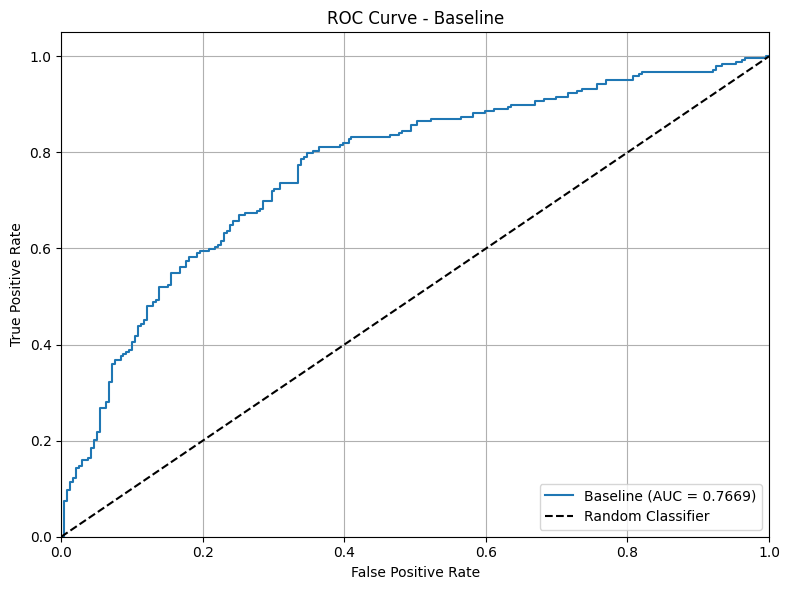

In [ ]:
# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Baseline (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Baseline')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
thresholds = np.arange(0.01, 1.0, 0.01)

best_metrics = {
    'accuracy': (0, 0),
    'precision': (0, 0),
    'recall': (0, 0),
    'f1': (0, 0),
    'f2': (0, 0),
    'specificity': (0, 0),
}

for t in thresholds:
    y_pred = (y_pred_proba >= t).astype(int)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, zero_division=0)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    f2 = fbeta_score(y_test, y_pred, beta=2)
    spec = tn / (tn + fp)
    
    if acc > best_metrics['accuracy'][1]:      best_metrics['accuracy'] = (t, acc)
    if prec > best_metrics['precision'][1]:    best_metrics['precision'] = (t, prec)
    if rec > best_metrics['recall'][1]:        best_metrics['recall'] = (t, rec)
    if f1 > best_metrics['f1'][1]:             best_metrics['f1'] = (t, f1)
    if f2 > best_metrics['f2'][1]:             best_metrics['f2'] = (t, f2)
    if spec > best_metrics['specificity'][1]:  best_metrics['specificity'] = (t, spec)

# Print results
print("Optimal thresholds for each metric (Baseline):")
for metric, (threshold, score) in best_metrics.items():
    print(f"{metric.capitalize():<12}: Threshold = {threshold:.2f}, Score = {score:.4f}")

# Save threshold corresponding to the best F2 score
best_threshold = best_metrics['f2'][0]
best_f2 = best_metrics['f2'][1]

Baseline 각 지표 기준 최적 Thresholds:
Accuracy    : Threshold = 0.45, Score = 0.7238
Precision   : Threshold = 0.83, Score = 0.9474
Recall      : Threshold = 0.01, Score = 1.0000
F1          : Threshold = 0.44, Score = 0.7437
F2          : Threshold = 0.27, Score = 0.8345
Specificity : Threshold = 0.83, Score = 0.9958


In [ ]:
best_threshold = best_metrics['f2'][0] 

# Prediction based on optimal threshold
y_pred_opt = (y_pred_proba >= best_threshold).astype(int)

# Decompose confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_opt).ravel()

# Print performance metrics
print(f"Performance metrics at Baseline F2-optimal threshold = {best_threshold:.2f}:")
print(f"Accuracy     : {accuracy_score(y_test, y_pred_opt):.4f}")
print(f"Precision    : {precision_score(y_test, y_pred_opt):.4f}")
print(f"Recall       : {recall_score(y_test, y_pred_opt):.4f}")
print(f"Specificity  : {tn / (tn + fp):.4f}")
print(f"F1 Score     : {f1_score(y_test, y_pred_opt):.4f}")
print(f"F2 Score     : {best_f2:.4f}")

Baseline F2 Score 기준 최적 Threshold = 0.27 성능지표:
Accuracy     : 0.5711
Precision    : 0.5397
Recall       : 0.9665
Specificity  : 0.1757
F1 Score     : 0.6927
F2 Score     : 0.8345


In [ ]:
best_threshold = best_metrics['f1'][0] 

# Prediction based on optimal threshold
y_pred_opt = (y_pred_proba >= best_threshold).astype(int)

# Decompose confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_opt).ravel()

# Print performance metrics
print(f"Performance metrics at Baseline F1-optimal threshold = {best_threshold:.2f}:")
print(f"Accuracy     : {accuracy_score(y_test, y_pred_opt):.4f}")
print(f"Precision    : {precision_score(y_test, y_pred_opt):.4f}")
print(f"Recall       : {recall_score(y_test, y_pred_opt):.4f}")
print(f"Specificity  : {tn / (tn + fp):.4f}")
print(f"F1 Score     : {f1_score(y_test, y_pred_opt):.4f}")
print(f"F2 Score     : {best_f2:.4f}")

Baseline F2 Score 기준 최적 Threshold = 0.44 성능지표:
Accuracy     : 0.7218
Precision    : 0.6893
Recall       : 0.8075
Specificity  : 0.6360
F1 Score     : 0.7437
F2 Score     : 0.8345


## ff17 Model

In [ ]:
# Set data to use (including interactions)
X_train_ff17 = train_df[X_ff17_cols]
y_train = train_df[target]
X_test_ff17 = test_df[X_ff17_cols]
y_test = test_df[target]

# Convert inf to NaN
X_train_ff17 = X_train_ff17.replace([np.inf, -np.inf], np.nan)
X_test_ff17 = X_test_ff17.replace([np.inf, -np.inf], np.nan)

# Replace NaNs with mean values
X_train_ff17 = X_train_ff17.fillna(X_train_ff17.mean())
X_test_ff17 = X_test_ff17.fillna(X_test_ff17.mean())

# Build pipeline
pipe_ff17 = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', LogisticRegressionCV(
        Cs=10,
        cv=5,
        penalty='l1',
        solver='saga',
        scoring='roc_auc',
        max_iter=10000,
        random_state=42,
        n_jobs=-1
    ))
])

# Train model
pipe_ff17.fit(X_train_ff17, y_train)

# Check optimal C
best_c_ff17 = pipe_ff17.named_steps['clf'].C_[0]
print(f"Optimal C (1/lambda) for ff17 interaction model: {best_c_ff17:.4f}")

ff17 interaction 모델 최적 C (1/lambda): 0.0464


In [ ]:
# Predict probabilities on the test set
y_pred_proba_ff17 = pipe_ff17.predict_proba(X_test_ff17)[:, 1]

# ROC AUC score
auc_score_ff17 = roc_auc_score(y_test, y_pred_proba_ff17)
print(f"ff17 interaction model Test ROC AUC: {auc_score_ff17:.4f}")

ff17 interaction 모델 Test ROC AUC: 0.7581


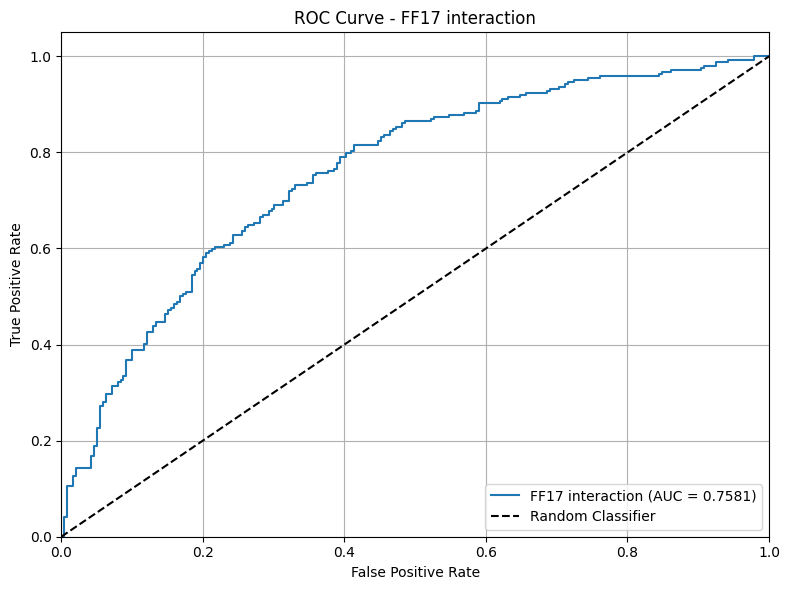

In [ ]:
# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_ff17)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'FF17 interaction (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - FF17 interaction')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
thresholds = np.arange(0.01, 1.0, 0.01)

best_metrics = {
    'accuracy': (0, 0),
    'precision': (0, 0),
    'recall': (0, 0),
    'f1': (0, 0),
    'f2': (0, 0),
    'specificity': (0, 0),
}

for t in thresholds:
    y_pred = (y_pred_proba_ff17 >= t).astype(int)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, zero_division=0)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    f2 = fbeta_score(y_test, y_pred, beta=2)
    spec = tn / (tn + fp)
    
    if acc > best_metrics['accuracy'][1]:      best_metrics['accuracy'] = (t, acc)
    if prec > best_metrics['precision'][1]:    best_metrics['precision'] = (t, prec)
    if rec > best_metrics['recall'][1]:        best_metrics['recall'] = (t, rec)
    if f1 > best_metrics['f1'][1]:             best_metrics['f1'] = (t, f1)
    if f2 > best_metrics['f2'][1]:             best_metrics['f2'] = (t, f2)
    if spec > best_metrics['specificity'][1]:  best_metrics['specificity'] = (t, spec)

# Print results
print("Optimal thresholds for each metric (FF17 interaction):")
for metric, (threshold, score) in best_metrics.items():
    print(f"{metric.capitalize():<12}: Threshold = {threshold:.2f}, Score = {score:.4f}")

# Save threshold corresponding to the best F2 score
best_threshold = best_metrics['f2'][0]
best_f2 = best_metrics['f2'][1]

FF17 각 지표 기준 최적 Thresholds:
Accuracy    : Threshold = 0.43, Score = 0.6987
Precision   : Threshold = 0.81, Score = 0.9259
Recall      : Threshold = 0.01, Score = 1.0000
F1          : Threshold = 0.39, Score = 0.7357
F2          : Threshold = 0.27, Score = 0.8370
Specificity : Threshold = 0.90, Score = 0.9958


In [ ]:
# Prediction based on optimal threshold
y_pred_opt = (y_pred_proba_ff17 >= best_threshold).astype(int)

# Decompose confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_opt).ravel()

# Print performance metrics
print(f"Performance metrics at FF17 F2-optimal threshold = {best_threshold:.2f}:")
print(f"Accuracy     : {accuracy_score(y_test, y_pred_opt):.4f}")
print(f"Precision    : {precision_score(y_test, y_pred_opt):.4f}")
print(f"Recall       : {recall_score(y_test, y_pred_opt):.4f}")
print(f"Specificity  : {tn / (tn + fp):.4f}")
print(f"F1 Score     : {f1_score(y_test, y_pred_opt):.4f}")
print(f"F2 Score     : {best_f2:.4f}")

FF17 F2 Score 기준 최적 Threshold = 0.27 성능지표:
Accuracy     : 0.5962
Precision    : 0.5558
Recall       : 0.9582
Specificity  : 0.2343
F1 Score     : 0.7035
F2 Score     : 0.8370


In [ ]:
best_threshold = best_metrics['f1'][0]

# Prediction based on optimal threshold
y_pred_opt = (y_pred_proba_ff17 >= best_threshold).astype(int)

# Decompose confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_opt).ravel()

# Print performance metrics
print(f"Performance metrics at FF17 F1-optimal threshold = {best_threshold:.2f}:")
print(f"Accuracy     : {accuracy_score(y_test, y_pred_opt):.4f}")
print(f"Precision    : {precision_score(y_test, y_pred_opt):.4f}")
print(f"Recall       : {recall_score(y_test, y_pred_opt):.4f}")
print(f"Specificity  : {tn / (tn + fp):.4f}")
print(f"F1 Score     : {f1_score(y_test, y_pred_opt):.4f}")
print(f"F2 Score     : {best_f2:.4f}")

FF17 F2 Score 기준 최적 Threshold = 0.39 성능지표:
Accuracy     : 0.6904
Precision    : 0.6417
Recall       : 0.8619
Specificity  : 0.5188
F1 Score     : 0.7357
F2 Score     : 0.8370


## IGFC Model

In [ ]:
# Set data to use (including IGFC interactions)
X_train_igfc = train_df[X_igfc_cols]
y_train = train_df[target]
X_test_igfc = test_df[X_igfc_cols]
y_test = test_df[target]

# Convert inf to NaN
X_train_igfc = X_train_igfc.replace([np.inf, -np.inf], np.nan)
X_test_igfc = X_test_igfc.replace([np.inf, -np.inf], np.nan)

# Replace NaNs with mean values
X_train_igfc = X_train_igfc.fillna(X_train_igfc.mean())
X_test_igfc = X_test_igfc.fillna(X_test_igfc.mean())

# Build pipeline
pipe_igfc = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', LogisticRegressionCV(
        Cs=10,
        cv=5,
        penalty='l1',
        solver='saga',
        scoring='roc_auc',
        max_iter=10000,
        random_state=42,
        n_jobs=-1
    ))
])

# Train model
pipe_igfc.fit(X_train_igfc, y_train)

# Check optimal C
best_c_igfc = pipe_igfc.named_steps['clf'].C_[0]
print(f"Optimal C (1/lambda) for IGFC interaction model: {best_c_igfc:.4f}")

IGFC interaction 모델 최적 C (1/lambda): 0.0464


In [ ]:
# Predict probabilities on the test set
y_pred_proba_igfc = pipe_igfc.predict_proba(X_test_igfc)[:, 1]

# ROC AUC score
auc_score_igfc = roc_auc_score(y_test, y_pred_proba_igfc)
print(f"IGFC interaction model Test ROC AUC: {auc_score_igfc:.4f}")

📈 IGFC interaction 모델 Test ROC AUC: 0.7701


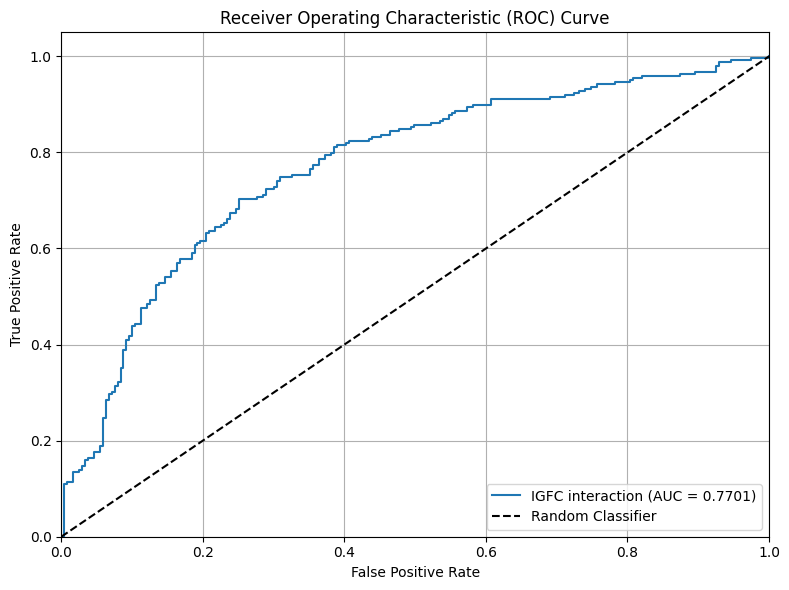

In [ ]:
# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_igfc)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'IGFC interaction (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, fbeta_score, confusion_matrix
)
import numpy as np

thresholds = np.arange(0.01, 1.0, 0.01)

best_metrics = {
    'accuracy': (0, 0),
    'precision': (0, 0),
    'recall': (0, 0),
    'f1': (0, 0),
    'f2': (0, 0),
    'specificity': (0, 0),
}

for t in thresholds:
    y_pred = (y_pred_proba_igfc >= t).astype(int)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, zero_division=0)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    f2 = fbeta_score(y_test, y_pred, beta=2)
    spec = tn / (tn + fp)
    
    if acc > best_metrics['accuracy'][1]:      best_metrics['accuracy'] = (t, acc)
    if prec > best_metrics['precision'][1]:    best_metrics['precision'] = (t, prec)
    if rec > best_metrics['recall'][1]:        best_metrics['recall'] = (t, rec)
    if f1 > best_metrics['f1'][1]:             best_metrics['f1'] = (t, f1)
    if f2 > best_metrics['f2'][1]:             best_metrics['f2'] = (t, f2)
    if spec > best_metrics['specificity'][1]:  best_metrics['specificity'] = (t, spec)

# Print result
print("Optimal thresholds for each metric:")
for metric, (threshold, score) in best_metrics.items():
    print(f"{metric.capitalize():<12}: Threshold = {threshold:.2f}, Score = {score:.4f}")

각 지표 기준 최적 Thresholds:
Accuracy    : Threshold = 0.50, Score = 0.7259
Precision   : Threshold = 0.80, Score = 0.9630
Recall      : Threshold = 0.01, Score = 1.0000
F1          : Threshold = 0.43, Score = 0.7368
F2          : Threshold = 0.17, Score = 0.8345
Specificity : Threshold = 0.80, Score = 0.9958


In [ ]:
# Prediction based on optimal threshold
best_threshold = best_metrics['f2'][0] 
y_pred_opt = (y_pred_proba_igfc >= best_threshold).astype(int)

# Decompose confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_opt).ravel()

# Print recalculated performance metrics
print(f"Performance metrics at optimal threshold = {best_threshold:.2f}:")
print(f"Accuracy     : {accuracy_score(y_test, y_pred_opt):.4f}")
print(f"Precision    : {precision_score(y_test, y_pred_opt):.4f}")
print(f"Recall       : {recall_score(y_test, y_pred_opt):.4f}")
print(f"Specificity  : {tn / (tn + fp):.4f}")
print(f"F1 Score     : {f1_score(y_test, y_pred_opt):.4f}")
print(f"F2 Score     : {best_f2:.4f}")

최적 Threshold = 0.17 기준 성능지표:
Accuracy     : 0.5209
Precision    : 0.5108
Recall       : 0.9916
Specificity  : 0.0502
F1 Score     : 0.6743
F2 Score     : 0.8370


In [ ]:
best_threshold = best_metrics['f1'][0]

# Prediction based on optimal threshold
y_pred_opt = (y_pred_proba_igfc >= best_threshold).astype(int)

# Decompose confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_opt).ravel()

# Print recalculated performance metrics
print(f"Performance metrics at optimal threshold = {best_threshold:.2f}:")
print(f"Accuracy     : {accuracy_score(y_test, y_pred_opt):.4f}")
print(f"Precision    : {precision_score(y_test, y_pred_opt):.4f}")
print(f"Recall       : {recall_score(y_test, y_pred_opt):.4f}")
print(f"Specificity  : {tn / (tn + fp):.4f}")
print(f"F1 Score     : {f1_score(y_test, y_pred_opt):.4f}")
print(f"F2 Score     : {best_f2:.4f}")

최적 Threshold = 0.43 기준 성능지표:
Accuracy     : 0.7071
Precision    : 0.6689
Recall       : 0.8201
Specificity  : 0.5941
F1 Score     : 0.7368
F2 Score     : 0.8370


## Get the coefficients for each model

In [ ]:
def show_top_coefficients(model_pipe, feature_names, model_name, top_n=50):
    clf = model_pipe.named_steps['clf']
    coef = clf.coef_[0]
    coef_df = pd.DataFrame({'feature': feature_names, 'coefficient': coef})
    selected = coef_df[coef_df['coefficient'] != 0]
    top_selected = selected.reindex(selected['coefficient'].abs().sort_values(ascending=False).index).head(top_n)
    print(f"\n[Top {top_n}] Selected Features in {model_name}")
    print(top_selected.to_string(index=False))

show_top_coefficients(pipe, X_train.columns, "Baseline Model")
show_top_coefficients(pipe_ff17, X_train_ff17.columns, "ff17 Interaction Model")
show_top_coefficients(pipe_igfc, X_train_igfc.columns, "IGFC Interaction Model")


[Top 50] Selected Features in Baseline Model
               feature  coefficient
        ebit_to_assets    -0.578214
                   roa    -0.408715
                  page     0.355812
       option_to_asset    -0.286521
          pi_to_assets    -0.226224
       bonus_to_assets    -0.188854
              Itenure6    -0.176187
              Itenure2     0.111502
       ppent_to_assets    -0.111364
                 I2019     0.096625
                 Iff15     0.092379
                 I2022    -0.086811
              Itenure4    -0.083945
               I3y_lag     0.081091
              Itenure5    -0.077372
                 I1992    -0.075935
                 I2008    -0.075328
   equity_ratio_3y_lag    -0.074716
                 I1993    -0.071923
 tdc1_to_assets_3y_lag     0.071258
                 I2000     0.067017
option_to_asset_3y_lag     0.064979
                 I2018     0.064880
                  Iff1     0.059478
          dp_to_assets     0.052906
                 I

### Calculate coefficient and p-value(probability) using statsmodel

In [ ]:
import statsmodels.api as sm

In [ ]:
def run_statsmodels_logit(model_pipe, X_df, y_series, model_name):
    """
    Run statsmodels logistic regression using features selected by sklearn Lasso logistic model.
    """
    clf = model_pipe.named_steps['clf']
    coef = clf.coef_[0]
    selected_idx = np.where(coef != 0)[0]
    selected_features = [X_df.columns[i] for i in selected_idx]

    if not selected_features:
        print(f"\n[{model_name}] No features selected. Regression cannot be performed.")
        return None

    # Extract and preprocess data
    X_selected = X_df[selected_features].replace([np.inf, -np.inf], np.nan).fillna(X_df.mean())
    X_selected_const = sm.add_constant(X_selected)
    y_cleaned = y_series.loc[X_selected.index]  # Ensure alignment with X

    # Run statsmodels logistic regression
    print(f"\n[{model_name}] StatsModels Logit Regression Results (Number of selected features: {len(selected_features)})")
    logit_model = sm.Logit(y_cleaned, X_selected_const)
    result = logit_model.fit(disp=False)
    print(result.summary())
    return result

In [91]:
# Baseline Model
run_statsmodels_logit(pipe, X_train, y_train, "Baseline Model")


[Baseline Model] StatsModels Logit 회귀 결과 (선택된 변수 수: 50)
                           Logit Regression Results                           
Dep. Variable:               forced_3   No. Observations:                 2863
Model:                          Logit   Df Residuals:                     2812
Method:                           MLE   Df Model:                           50
Date:                Sat, 31 May 2025   Pseudo R-squ.:                  0.2040
Time:                        18:54:38   Log-Likelihood:                -1450.4
converged:                       True   LL-Null:                       -1822.1
Covariance Type:            nonrobust   LLR p-value:                3.080e-124
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -4.8165      0.498     -9.668      0.000      -5.793      -3.840
I3y_lag                    0.4293     

### If Singular Matrix

In [ ]:
def run_statsmodels_logit_safe(model_pipe, X_df, y_series, model_name):
    clf = model_pipe.named_steps['clf']
    coef = clf.coef_[0]
    selected_idx = np.where(coef != 0)[0]
    selected_features = [X_df.columns[i] for i in selected_idx]

    if not selected_features:
        print(f"\n[{model_name}] No features were selected.")
        return None

    # Data preprocessing
    X_sel = X_df[selected_features].replace([np.inf, -np.inf], np.nan).fillna(X_df.mean())
    
    # Remove constant columns (columns with only one unique value)
    nunique = X_sel.nunique()
    X_sel = X_sel.loc[:, nunique > 1]

    # Remove potentially linearly dependent columns
    X_sel = X_sel.loc[:, ~X_sel.columns.duplicated()]  # Remove duplicate columns

    # Add intercept
    X_sel_const = sm.add_constant(X_sel)
    y_cleaned = y_series.loc[X_sel_const.index]

    # Run with GLM (more flexible than Logit)
    try:
        model = sm.GLM(y_cleaned, X_sel_const, family=sm.families.Binomial())
        result = model.fit()
        print(f"\n[{model_name}] statsmodels GLM(Logit) regression results (number of variables: {X_sel_const.shape[1]})")
        print(result.summary())
        return result
    except np.linalg.LinAlgError as e:
        print(f"\n[{model_name}] Regression failed due to multicollinearity: {e}")
        return None

In [43]:
# ff17 Interaction Model
run_statsmodels_logit_safe(pipe_ff17, X_train_ff17, y_train, "ff17 Interaction Model")


[ff17 Interaction Model] statsmodels GLM(Logit) 회귀 결과 (변수 수: 115)
                 Generalized Linear Model Regression Results                  
Dep. Variable:               forced_3   No. Observations:                 1908
Model:                            GLM   Df Residuals:                     1793
Model Family:                Binomial   Df Model:                          114
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -934.89
Date:                Sun, 01 Jun 2025   Deviance:                       1869.8
Time:                        13:56:28   Pearson chi2:                 4.08e+03
No. Iterations:                    10   Pseudo R-squ. (CS):             0.3339
Covariance Type:            nonrobust                                         
                                            coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------

In [44]:
# IGFC Interaction Model
run_statsmodels_logit(pipe_igfc, X_train_igfc, y_train, "IGFC Interaction Model")


[IGFC Interaction Model] StatsModels Logit 회귀 결과 (선택된 변수 수: 48)
                           Logit Regression Results                           
Dep. Variable:               forced_3   No. Observations:                 1908
Model:                          Logit   Df Residuals:                     1859
Method:                           MLE   Df Model:                           48
Date:                Sun, 01 Jun 2025   Pseudo R-squ.:                  0.2118
Time:                        13:56:30   Log-Likelihood:                -1042.4
converged:                       True   LL-Null:                       -1322.5
Covariance Type:            nonrobust   LLR p-value:                 1.738e-88
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              -4.6311      0.655     -7.071      0.000      -5.915      -3.347
pag

### Get coefficient and p-value(probability) using Bootstrap

In [ ]:
from sklearn.linear_model import LogisticRegression

def show_top_coefficients_bootstrap(X, y, model_name, B=200, top_n=30, fixed_C=0.0464, random_state=42):
    np.random.seed(random_state)
    feature_names = list(X.columns)
    n_features = len(feature_names)
    
    coefs = np.zeros((B, n_features))

    for b in range(B):
        # Bootstrap resampling
        X_resampled, y_resampled = resample(X, y)

        # New Lasso model pipeline (fixed C)
        pipe = Pipeline([
            ('scaler', StandardScaler()),
            ('clf', LogisticRegression(
                C=fixed_C,
                penalty='l1',
                solver='saga',
                max_iter=10000,
                random_state=random_state + b
            ))
        ])

        # Train model
        pipe.fit(X_resampled, y_resampled)
        coefs[b, :] = pipe.named_steps['clf'].coef_[0]

    # Compute mean coefficient and selection probability
    coef_df = pd.DataFrame({
        'feature': feature_names,
        'mean_coef': np.mean(coefs, axis=0),
        'selection_prob': np.mean(coefs != 0, axis=0)
    })

    # Exclude features never selected
    coef_df = coef_df[coef_df['selection_prob'] > 0]

    # Display top_n features by absolute mean coefficient and by selection probability
    top_by_coef = coef_df.reindex(coef_df['mean_coef'].abs().sort_values(ascending=False).index).head(top_n)
    top_by_prob = coef_df.sort_values(by='selection_prob', ascending=False).head(top_n)

    # Output
    print(f"\n [Top {top_n}] in {model_name} by |mean coef|:")
    print(top_by_coef.to_string(index=False))

    print(f"\n [Top {top_n}] in {model_name} by selection probability:")
    print(top_by_prob.to_string(index=False))

    return top_by_coef, top_by_prob

In [ ]:
C_value = 0.0464

# Baseline
top_baseline_coef, top_baseline_prob = show_top_coefficients_bootstrap(X_train, y_train, "Baseline Model", fixed_C=C_value)

# ff17
top_ff17_coef, top_ff17_prob = show_top_coefficients_bootstrap(
    X_train_ff17.drop(columns=['Iff17'], errors='ignore'), y_train, "ff17 Interaction Model", fixed_C=C_value)

# IGFC
top_igfc_coef, top_igfc_prob = show_top_coefficients_bootstrap(X_train_igfc, y_train, "IGFC Interaction Model", fixed_C=C_value)


📊 [Top 30] in Baseline Model by |mean coef|:
               feature  mean_coef  selection_prob
        ebit_to_assets  -0.457657           0.980
                   roa  -0.442713           0.965
                  page   0.379499           1.000
       option_to_asset  -0.282059           0.995
          pi_to_assets  -0.211589           0.775
       bonus_to_assets  -0.203910           0.995
              Itenure6  -0.176854           0.995
              Itenure2   0.122856           0.985
       ppent_to_assets  -0.106327           0.935
                 I2019   0.090389           0.985
               I3y_lag   0.088754           0.945
          dp_to_assets   0.088051           0.525
              Itenure4  -0.085882           0.920
              Itenure5  -0.084701           0.940
                 Iff15   0.084498           0.935
                 I1993  -0.083785           0.955
                 I2022  -0.083722           0.960
                 I2008  -0.079761           0.915
opti

In [ ]:
# Save
with pd.ExcelWriter("bootstrap_lasso_summary.xlsx", engine='openpyxl') as writer:
    top_baseline_coef.to_excel(writer, sheet_name='Baseline_by_coef', index=False)
    top_baseline_prob.to_excel(writer, sheet_name='Baseline_by_prob', index=False)
    top_ff17_coef.to_excel(writer, sheet_name='ff17_by_coef', index=False)
    top_ff17_prob.to_excel(writer, sheet_name='ff17_by_prob', index=False)
    top_igfc_coef.to_excel(writer, sheet_name='IGFC_by_coef', index=False)
    top_igfc_prob.to_excel(writer, sheet_name='IGFC_by_prob', index=False)